### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [84]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
school_data_to_load = "../Resources/schools_complete.csv"
student_data_to_load = "../Resources/students_complete.csv"

# Read School and Student Data File and store into Pandas Data Frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()




,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

* Calculate the total number of schools

* Calculate the total number of students

* Calculate the total budget

* Calculate the average math score 

* Calculate the average reading score

* Calculate the overall passing rate (overall average score), i.e. (avg. math score + avg. reading score)/2

* Calculate the percentage of students with a passing math score (70 or greater)

* Calculate the percentage of students with a passing reading score (70 or greater)

* Create a dataframe to hold the above results

* Optional: give the displayed data cleaner formatting

In [85]:
#Calculating key statistics 
Total_School=len(school_data_complete["school_name"].unique())
Total_Student=school_data_complete["student_name"].count()
Total_Budget=school_data["budget"].sum()
Average_Math_Score=school_data_complete["math_score"].mean()
Average_Reading_Score=school_data_complete["reading_score"].mean()

#Calculate passing rate for math
pass_or_not_math=[]
[pass_or_not_math.append(1) for v in school_data_complete["math_score"] if v >= 70]
Pass_Math=sum(pass_or_not_math)/Total_Student*100

#Calculate passing rate for reading score
pass_or_not_reading=[]
[pass_or_not_reading.append(1) for v in school_data_complete["reading_score"] if v >= 70]

#Calculate overal passing rate
Pass_Reading=sum(pass_or_not_reading)/Total_Student*100
Overal_Pass=round((Average_Math_Score+Average_Reading_Score)/2,6)

#Construct dataframe for reporing
Summary=pd.DataFrame({"Total Schools":[Total_School,],
              "Total Students":[Total_Student,],
              "Total Budget":[Total_Budget,],
              "Average Math Score":[Average_Math_Score,],
              "Average Reading Score":[Average_Reading_Score,],
              "% Passing Math":[Pass_Math,],
              "% Passing Reading":[Pass_Reading,],
              "% Overal Passing Rate":[Overal_Pass,]
             })

#Formating for display
Summary["Total Students"] = Summary["Total Students"].map("{:,}".format)
Summary["Total Budget"] = Summary["Total Budget"].astype(float).map("${:,}0".format)
Summary


,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overal Passing Rate
0,15,"39,170","$24,649,428.00",78.985371,81.87784,74.980853,85.805463,80.431606


## School Summary

* Create an overview table that summarizes key metrics about each school, including:
  * School Name
  * School Type
  * Total Students
  * Total School Budget
  * Per Student Budget
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)
  
* Create a dataframe to hold the above results

## Top Performing Schools (By Passing Rate)

* Sort and display the top five schools in overall passing rate

In [86]:
#Merge DataFrame to include type variable
school_data_complete1 = pd.merge(student_data, school_data, on=["school_name", "school_name"])

school_data_complete2=school_data_complete.groupby("school_name")

#Find size of each school
student_groupby=school_data_complete2["student_name"].count()
school_char=school_data[["school_name","type","budget"]]
school_char["Per Student Budget"]=school_data["budget"]/school_data['size']


#Calculate Average math and reading score at each school
school_average_scores=school_data_complete2["reading_score","math_score"].mean()

#Create data frame including school name, type, perstduent budget, average reading scores , average math scores and school size
school_table1=pd.merge(school_char,school_average_scores,on="school_name")
school_table2=pd.merge(school_table1,student_groupby,on="school_name")
school_table2=school_table2.rename(columns={"reading_score":"Average Reading Score","math_score":"Average Math Score","student_name":"Total Students"})

#Calculating math and reading passing rate at each school
pass_list_math=[]
pass_list_reading=[]
for i in range(len(school_table2["school_name"])):
    data_math=school_data_complete.loc[(school_data_complete["school_name"]==school_table2["school_name"][i]) & (school_data_complete["math_score"]>=70)]
    data_reading=school_data_complete.loc[(school_data_complete["school_name"]==school_table2["school_name"][i]) & (school_data_complete["reading_score"]>=70)]
    pass_list_math.append(len(data_math["Student ID"])/school_table2["Total Students"][i]*100)
    pass_list_reading.append(len(data_reading["Student ID"])/school_table2["Total Students"][i]*100)
    
#Add column about percentage of student passing in math, reading and overal
school_table2["% Passing Math"]=pass_list_math
school_table2["% Passing Reading"]=pass_list_reading
school_table2["% Overall Passing Rate"]=(school_table2["% Passing Math"]+school_table2["% Passing Reading"])/2
school_table3=school_table2.sort_values("% Overall Passing Rate", ascending=False)
[]

#Put column in right order 
school_table4=school_table3[["school_name","type","Total Students","budget","Per Student Budget","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing Rate"]]
school_table4
              
#Rename index and column names
school_table4.index
school_table4=school_table4.rename(index={6:"Cabrera High School", 14:"Thomas High School", 9:"Pena High School", 4:"Griffin High School", 5:"Wilson High School", 10:"Wright High School", 2:"Shelton High School", 8:"Holden High School", 7:"Bailey High School", 3:"Hernandez High School", 13:"Ford High School", 12:"Johnson High School", 0:"Huang High School", 1:"Figueroa High School", 11:"Rodriguez High School"})
school_table5=school_table4[["type","Total Students","budget","Per Student Budget","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing Rate"]]
school_table5=school_table5.rename(columns={"type":"School Type","budget":"Total School Budget"})
school_table5["Total School Budget"]=school_table5["Total School Budget"].astype(float).map("${:,}0".format)
school_table5["Per Student Budget"]=school_table5["Per Student Budget"].astype(float).map("${:,}0".format)
school_table5.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,95.203679


## Bottom Performing Schools (By Passing Rate)

* Sort and display the five worst-performing schools

In [87]:
school_table5_worst=school_table5.sort_values("% Overall Passing Rate", ascending=True)
school_table5_worst.head()

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.842711,80.744686,66.366592,80.220055,73.293323
Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.711767,81.158020,65.988471,80.739234,73.363852
Huang High School,District,2917,"$1,910,635.00",$655.00,76.629414,81.182722,65.683922,81.316421,73.500171
Johnson High School,District,4761,"$3,094,650.00",$650.00,77.072464,80.966394,66.057551,81.222432,73.639992
Ford High School,District,2739,"$1,763,916.00",$644.00,77.102592,80.746258,68.309602,79.299014,73.804308


## Math Scores by Grade

* Create a table that lists the average Reading Score for students of each grade level (9th, 10th, 11th, 12th) at each school.

  * Create a pandas series for each grade. Hint: use a conditional statement.
  
  * Group each series by school
  
  * Combine the series into a dataframe
  
  * Optional: give the displayed data cleaner formatting

In [88]:
#Generating table to show each school's average reading scores at different grade
#Calculate average 9th grade math score at each school
math_df=school_data_complete[["school_name","grade","math_score"]]
nine_math=math_df.loc[math_df["grade"]=="9th"]
nine_math_g=nine_math.groupby("school_name").mean()
nine_math_g

#Calculate average 10th grade math score at each school
ten_math=math_df.loc[math_df["grade"]=="10th"]
ten_math_g=ten_math.groupby("school_name").mean()
ten_math_g

#Calculate average 11th grade math score at each school
eleven_math=math_df.loc[math_df["grade"]=="11th"]
eleven_math_g=eleven_math.groupby("school_name").mean()
eleven_math_g

#Calculate average 12th grade math score at each school
twleve_math=math_df.loc[math_df["grade"]=="12th"]
twleve_math_g=twleve_math.groupby("school_name").mean()
twleve_math_g

#Construct DataFrame
comb_grade_math=pd.DataFrame({
    "9th":[v for v in nine_math_g["math_score"]],
    "10th":[v for v in ten_math_g["math_score"]],
    "11th":[v for v in eleven_math_g["math_score"]],
    "12th":[v for v in twleve_math_g["math_score"]]
})

#Set index of the DataFrame to corresponding schools
comb_grade_math=comb_grade_math.rename(index={0:"Bailey High School", 1:"Cabrera High School", 2:"Figueroa High School", 3:"Ford High School", 4:"Griffin High School", 5:"Hernandez High School", 6:"Holden High School", 7:"Huang High School", 8:"Johnson High School", 9:"Pena High School", 10:"Rodriguez High School", 11:"Shelton High School", 12:"Thomas High School", 13:"Wilson High School", 14:"Wright High School"})
comb_grade_math

,9th,10th,11th,12th
Bailey High School,77.083676,76.996772,77.515588,76.492218
Cabrera High School,83.094697,83.154506,82.765560,83.277487
Figueroa High School,76.403037,76.539974,76.884344,77.151369
Ford High School,77.361345,77.672316,76.918058,76.179963
Griffin High School,82.044010,84.229064,83.842105,83.356164
Hernandez High School,77.438495,77.337408,77.136029,77.186567
Holden High School,83.787402,83.429825,85.000000,82.855422
Huang High School,77.027251,75.908735,76.446602,77.225641
Johnson High School,77.187857,76.691117,77.491653,76.863248
Pena High School,83.625455,83.372000,84.328125,84.121547


## Reading Score by Grade 

* Perform the same operations as above for reading scores

In [89]:
#Generating table to show each school's average reading scores at different grade
#Calculate average 9th grade reading score at each school
reading_df=school_data_complete[["school_name","grade","reading_score"]]
nine_reading=reading_df.loc[reading_df["grade"]=="9th"]
nine_reading_g=nine_reading.groupby("school_name").mean()
nine_reading_g

#Calculate average 10th grade reading score at each school
ten_reading=reading_df.loc[reading_df["grade"]=="10th"]
ten_reading_g=ten_reading.groupby("school_name").mean()
ten_reading_g

#Calculate average 11th grade reading score at each school
eleven_reading=reading_df.loc[reading_df["grade"]=="11th"]
eleven_reading_g=eleven_reading.groupby("school_name").mean()
eleven_reading_g

#Calculate average 12th grade reading score at each school
twleve_reading=reading_df.loc[reading_df["grade"]=="12th"]
twleve_reading_g=twleve_reading.groupby("school_name").mean()
twleve_reading_g

#Construct DataFrame
comb_grade_reading=pd.DataFrame({
    "9th":[v for v in nine_reading_g["reading_score"]],
    "10th":[v for v in ten_reading_g["reading_score"]],
    "11th":[v for v in eleven_reading_g["reading_score"]],
    "12th":[v for v in twleve_reading_g["reading_score"]]
})

#Set index of the DataFrame to corresponding schools
comb_grade_reading=comb_grade_reading.rename(index={0:"Bailey High School", 1:"Cabrera High School", 2:"Figueroa High School", 3:"Ford High School", 4:"Griffin High School", 5:"Hernandez High School", 6:"Holden High School", 7:"Huang High School", 8:"Johnson High School", 9:"Pena High School", 10:"Rodriguez High School", 11:"Shelton High School", 12:"Thomas High School", 13:"Wilson High School", 14:"Wright High School"})
comb_grade_reading


,9th,10th,11th,12th
Bailey High School,81.303155,80.907183,80.945643,80.912451
Cabrera High School,83.676136,84.253219,83.788382,84.287958
Figueroa High School,81.198598,81.408912,80.640339,81.384863
Ford High School,80.632653,81.262712,80.403642,80.662338
Griffin High School,83.369193,83.706897,84.288089,84.013699
Hernandez High School,80.866860,80.660147,81.396140,80.857143
Holden High School,83.677165,83.324561,83.815534,84.698795
Huang High School,81.290284,81.512386,81.417476,80.305983
Johnson High School,81.260714,80.773431,80.616027,81.227564
Pena High School,83.807273,83.612000,84.335938,84.591160


## Scores by School Spending

* Create a table that breaks down school performances based on average Spending Ranges (Per Student). Use 4 reasonable bins to group school spending. Include in the table each of the following:
  * Average Math Score
  * Average Reading Score
  * % Passing Math
  * % Passing Reading
  * Overall Passing Rate (Average of the above two)

In [90]:
# Sample bins. Feel free to create your own bins.
spending_bins = [0, 585, 615, 645, 675]
group_names = ["<$585", "$585-615", "$615-645", "$645-675"]

school_table4["Per Student Budget"]
school_table4_bin=school_table4

In [91]:
school_table4_bin["Spending Ranges(Per Student)"] = pd.cut(school_table4_bin["Per Student Budget"], spending_bins, labels=group_names, include_lowest=True)
school_table4_bin1=school_table4_bin[["Spending Ranges(Per Student)","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing Rate"]].groupby("Spending Ranges(Per Student)")
school_table4_bin1.mean()

#Contrary to expectations, with increased expenditure per student, schools' performance in math and reading decreased

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Spending Ranges(Per Student),,,,,
<$585,83.455399,83.933814,93.460096,96.610877,95.035486
$585-615,83.599686,83.885211,94.230858,95.900287,95.065572
$615-645,79.079225,81.891436,75.668212,86.106569,80.887391
$645-675,76.997210,81.027843,66.164813,81.133951,73.649382


## Scores by School Size

* Perform the same operations as above, based on school size.

In [92]:
# Sample bins. Feel free to create your own bins.
Size_bin=[0,1000,2000,5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

In [93]:
#Define data 
school_table4_Sizebin=school_table4[["Total Students","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing Rate"]]

#Bin school in their respective bins
school_table4_Sizebin["School Size"]=pd.cut(school_table4_Sizebin["Total Students"],Size_bin,labels=group_names)

#Create DataFrame
school_table4_Sizebin_complete=school_table4_Sizebin[["School Size","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing Rate"]].groupby("School Size")
school_table4_Sizebin_complete.mean()

#Base on our observations, large school size can lead to lower performance on Average Reading and Math Scores
#However, this effect only triggered when school size reach over 2000

,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
School Size,,,,,
Small (<1000),83.821598,83.929843,93.550225,96.099437,94.824831
Medium (1000-2000),83.374684,83.864438,93.599695,96.790680,95.195187
Large (2000-5000),77.746417,81.344493,69.963361,82.766634,76.364998


## Scores by School Type

* Perform the same operations as above, based on school type.

In [94]:
#Define bin and data
type_bin=["Charter","District"]
bin_name=["Charter","District"]
school_table4_typebin=school_table4[["type","Average Math Score","Average Reading Score","% Passing Math","% Passing Reading","% Overall Passing Rate"]]

#Define columns
Average_Math_Score=[school_table4["Average Math Score"][school_table4["type"]==v].mean() for v in type_bin]
Average_Reading_Score=[school_table4["Average Reading Score"][school_table4["type"]==v].mean() for v in type_bin]
Average_Reading_Score=[school_table4["Average Reading Score"][school_table4["type"]==v].mean() for v in type_bin]
Passing_Math=[school_table4["% Passing Math"][school_table4["type"]==v].mean() for v in type_bin]
Passing_Reading=[school_table4["% Passing Reading"][school_table4["type"]==v].mean() for v in type_bin]
Passing_Overal=[school_table4["% Overall Passing Rate"][school_table4["type"]==v].mean() for v in type_bin]

#Create DataFrame
pd.DataFrame({
    "School Type":type_bin,
    "Average Math Score":Average_Math_Score,
    "Average Reading Score":Average_Reading_Score,
    "% Passing Math":Passing_Math,
    "% Passing Reading":Passing_Reading,
    "% Passing Math":Passing_Math,
    "% Overal Passing Rate":Passing_Overal
})

#Based on the created table, Charter schools outperform  Distrcit schools
#However, the performance gap between Charter schools and Distrcit schools is much less significant in Average Reading Scores

,School Type,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overal Passing Rate
0,Charter,83.473852,83.896421,93.620830,96.586489,95.103660
1,District,76.956733,80.966636,66.548453,80.799062,73.673757


In [189]:
school_table5

,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.061895,83.975780,94.133477,97.039828,95.586652
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.418349,83.848930,93.272171,97.308869,95.290520
Pena High School,Charter,962,"$585,858.00",$609.00,83.839917,84.044699,94.594595,95.945946,95.270270
Griffin High School,Charter,1468,"$917,500.00",$625.00,83.351499,83.816757,93.392371,97.138965,95.265668
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.274201,83.989488,93.867718,96.539641,95.203679
Wright High School,Charter,1800,"$1,049,400.00",$583.00,83.682222,83.955000,93.333333,96.611111,94.972222
Shelton High School,Charter,1761,"$1,056,600.00",$600.00,83.359455,83.725724,93.867121,95.854628,94.860875
Holden High School,Charter,427,"$248,087.00",$581.00,83.803279,83.814988,92.505855,96.252927,94.379391
Bailey High School,District,4976,"$3,124,928.00",$628.00,77.048432,81.033963,66.680064,81.933280,74.306672
Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.289752,80.934412,66.752967,80.862999,73.807983


In [95]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

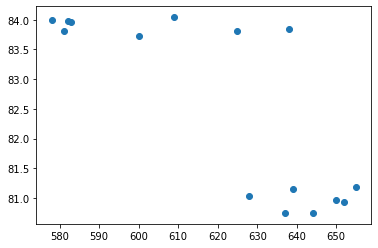

In [96]:
#Contry to expected, higher budget per student does not seems to lead to higher average reading score in school
#Furhtermore, most schools with budget per students higher than $630 have lower average reading score
import matplotlib.pyplot as plt
plt.scatter(school_table4["Per Student Budget"], school_table4["Average Reading Score"])

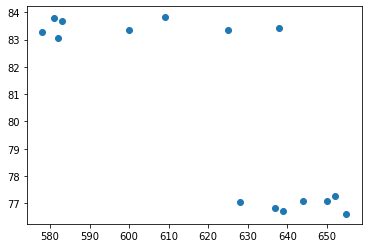

In [97]:
#Contry to expected, higher budget per student does not seems to lead to higher average math score in school
#Furhtermore, most schools with budget per students higher than $630 have lower average math score
plt.scatter(school_table4["Per Student Budget"], school_table4["Average Math Score"])

R squared value is-0.8001178148393905 and p value is 0.0003410653338978923


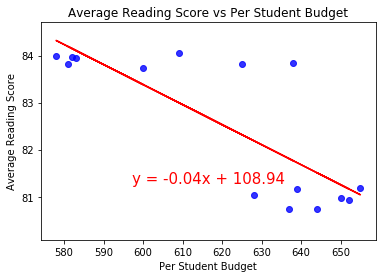

In [98]:
#Regression Analysis to assess statisticall significance of the negetive correlation between budget per student and average reading score
from scipy.stats import linregress

#Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(school_table4["Per Student Budget"], school_table4["Average Reading Score"])

#Define regress value and regression equation
regress_values = school_table4["Per Student Budget"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot scatter plot
plt.scatter(school_table4["Per Student Budget"], school_table4["Average Reading Score"],color="blue",alpha=0.8)
plt.plot(school_table4["Per Student Budget"],regress_values,"r-")

#Define y axis limit
range_x=school_table4["Per Student Budget"].max()-school_table4["Per Student Budget"].min()
range_y=school_table4["Average Reading Score"].max()-school_table4["Average Reading Score"].min()
ylimit=[school_table4["Average Reading Score"].min()-range_y/5,school_table4["Average Reading Score"].max()+range_y/5]
plt.ylim(ylimit[0],ylimit[1])

#Annotate regression line
plt.annotate(line_eq,(school_table4["Per Student Budget"].min()+range_x/4,school_table4["Average Reading Score"].min()+range_y/6),fontsize=15,color="red")

#Edit X and Y axis
plt.xlabel("Per Student Budget")
plt.ylabel("Average Reading Score")
plt.title("Average Reading Score vs Per Student Budget")

#Despite the high R Squared value and low p-value, there are signs of two distinct clusters. Therefore, additional factors and future analysis are needed to account for the clustering
print("R squared value is"+ str(rvalue) + " and p value is "+ str(pvalue))

R squared value is-0.794812220293093 and p value is 0.0003988631469824291


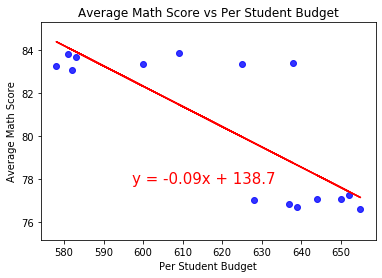

In [25]:
#Regression Analysis to assess statisticall significance of the negetive correlation between budget per student and average math score
from scipy.stats import linregress
#Perform linear regression
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(school_table4["Per Student Budget"], school_table4["Average Math Score"])
#Define regress value and regression equation
regress_values1 = school_table4["Per Student Budget"] * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
#Plot scatter plot
plt.scatter(school_table4["Per Student Budget"], school_table4["Average Math Score"],color="blue",alpha=0.8)
plt.plot(school_table4["Per Student Budget"],regress_values1,"r-")
#Define y axis limit
range_x1=school_table4["Per Student Budget"].max()-school_table4["Per Student Budget"].min()
range_y1=school_table4["Average Math Score"].max()-school_table4["Average Math Score"].min()
ylimit1=[school_table4["Average Math Score"].min()-range_y1/5,school_table4["Average Math Score"].max()+range_y1/5]
plt.ylim(ylimit1[0],ylimit1[1])
#Annotate regression line
plt.annotate(line_eq1,(school_table4["Per Student Budget"].min()+range_x1/4,school_table4["Average Math Score"].min()+range_y1/6),fontsize=15,color="red")
#Edit X and Y axis
plt.xlabel("Per Student Budget")
plt.ylabel("Average Math Score")
plt.title("Average Math Score vs Per Student Budget")

#Despite the high R Squared value and low p-value, there are signs of two distinct clusters. Therefore, additional factors and future analysis are needed to account for the clustering
print("R squared value is"+ str(rvalue1) + " and p value is "+ str(pvalue1))

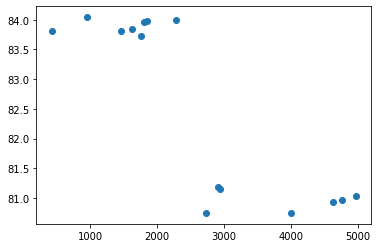

In [99]:
#Base on our finding of the negative correlation between Schools' average math scores or average reading scores with budgets per students, we further investigate other factors, including the number of students
#As expected, schools with more students have lower average reading scores
#However, the presence of clusters indicates the potential need to include school type as a factor
plt.scatter(school_table4["Total Students"], school_table4["Average Reading Score"])

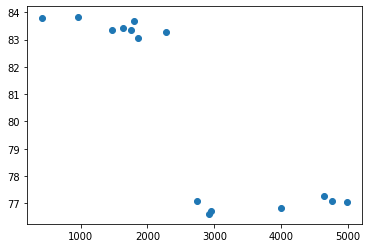

In [100]:
#As expected, schools with more students have lower average math scores
#However, the presence of clusters indicates the potential need to include school type as a factor
plt.scatter(school_table4["Total Students"], school_table4["Average Math Score"])

In [101]:
#Generate dummy variables to indicate school types
School_type=[]
for j in school_table4["type"]:
    if j=="Charter":
        School_type.append(1)
    else:
        School_type.append(0)
school_table4["School_type"]=School_type
school_table4.head()

,school_name,type,Total Students,budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate,Spending Ranges(Per Student),School_type
Cabrera High School,Cabrera High School,Charter,1858,1081356,582.0,83.061895,83.975780,94.133477,97.039828,95.586652,<$585,1
Thomas High School,Thomas High School,Charter,1635,1043130,638.0,83.418349,83.848930,93.272171,97.308869,95.290520,$615-645,1
Pena High School,Pena High School,Charter,962,585858,609.0,83.839917,84.044699,94.594595,95.945946,95.270270,$585-615,1
Griffin High School,Griffin High School,Charter,1468,917500,625.0,83.351499,83.816757,93.392371,97.138965,95.265668,$615-645,1
Wilson High School,Wilson High School,Charter,2283,1319574,578.0,83.274201,83.989488,93.867718,96.539641,95.203679,<$585,1


In [103]:
#Analyzing factors impacting schools' performance in mathematics with the multilinear regression model
import numpy as np
import matplotlib.pyplot as plt
import pandas

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm


Per_Student_Budget = school_table4["Per Student Budget"]
Total_Students = school_table4["Total Students"]
School_Type = school_table4["School_type"]
Average_Math_Score = school_table4["Average Math Score"]

data = pd.DataFrame({'Per_Student_Budget': Per_Student_Budget, 'Total_Students': Total_Students, 'School_Type': School_Type, "Average_Math_Score" : Average_Math_Score})

# Fit the model
model = ols("Average_Math_Score ~ Per_Student_Budget + Total_Students + School_Type", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

#Based on ANOVA statistics, the only factor with a significantly large and statistically significant coefficient is school type
#The ANOVA result shows that Charter schools have higher performance in mathematics. This finding fits our expectations

                            OLS Regression Results                            
Dep. Variable:     Average_Math_Score   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     675.5
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           9.49e-13
Time:                        13:11:42   Log-Likelihood:                0.15115
No. Observations:                  15   AIC:                             7.698
Df Residuals:                      11   BIC:                             10.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             76.8927      2

In [79]:
#Analyzing factors impacting schools' performance in reading with the multilinear regression model
Per_Student_Budget = school_table4["Per Student Budget"]
Total_Students = school_table4["Total Students"]
School_Type = school_table4["School_type"]
Average_Reading_Score = school_table4["Average Reading Score"]

data = pd.DataFrame({'Per_Student_Budget': Per_Student_Budget, 'Total_Students': Total_Students, 'School_Type': School_Type, "Average_Reading_Score" : Average_Reading_Score})

# Fit the model
model = ols("Average_Reading_Score ~ Per_Student_Budget + Total_Students + School_Type", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

#Based on ANOVA statistics, the only factor with a significantly large and statistically significant coefficient is school type
#The ANOVA result shows that Charter schools have higher performance in mathematics. This finding fits our expectations

                              OLS Regression Results                             
Dep. Variable:     Average_Reading_Score   R-squared:                       0.992
Model:                               OLS   Adj. R-squared:                  0.989
Method:                    Least Squares   F-statistic:                     438.9
Date:                   Fri, 18 Dec 2020   Prob (F-statistic):           9.99e-12
Time:                           13:03:35   Log-Likelihood:                 8.9099
No. Observations:                     15   AIC:                            -9.820
Df Residuals:                         11   BIC:                            -6.988
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

In [104]:
#Augmented multilinear regression model to assess if increased budget brings more improvements among Chartered schools in terms of math scores performance.

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols

# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

#Define data
Per_Student_Budget = school_table4["Per Student Budget"]
Total_Students = school_table4["Total Students"]
School_Type = school_table4["School_type"]
Average_Math_Score = school_table4["Average Math Score"]
data = pd.DataFrame({'Per_Student_Budget': Per_Student_Budget, 'Total_Students': Total_Students, 'School_Type': School_Type, "Average_Math_Score" : Average_Math_Score})

# Fit the model
model = ols("Average_Math_Score ~ Per_Student_Budget + Total_Students + School_Type + Per_Student_Budget* School_Type", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)
#Base on ANOVA statistics, the coefficient of the interactive term is not statistically significant due to the large p-value
#Therefore, there is a lack of evidence suggesting that an increase in budgets creates different improvements in average math score

                            OLS Regression Results                            
Dep. Variable:     Average_Math_Score   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     460.6
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           2.74e-11
Time:                        13:12:03   Log-Likelihood:                0.15230
No. Observations:                  15   AIC:                             9.695
Df Residuals:                      10   BIC:                             13.24
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [126]:
#Augmented multilinear regression model to assess if increased budget brings more improvements among Chartered schools in terms of reading scores performance.

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm


Per_Student_Budget = school_table4["Per Student Budget"]
Total_Students = school_table4["Total Students"]
School_Type = school_table4["School_type"]
Average_Reading_Score = school_table4["Average Reading Score"]

data = pd.DataFrame({'Per_Student_Budget': Per_Student_Budget, 'Total_Students': Total_Students, 'School_Type': School_Type, "Average_Reading_Score" : Average_Reading_Score})

# Fit the model
model = ols("Average_Reading_Score ~ Per_Student_Budget + Total_Students + School_Type + Per_Student_Budget* School_Type", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)
# should be array([-4.99754526,  3.00250049, -0.50514907])

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)
#Base on ANOVA statistics, the coefficient of the interactive term is not statistically significant due to the large p-value
#Therefore, there is a lack of evidence suggesting that an increase in budgets creates different improvements in average reading score

                              OLS Regression Results                             
Dep. Variable:     Average_Reading_Score   R-squared:                       0.992
Model:                               OLS   Adj. R-squared:                  0.989
Method:                    Least Squares   F-statistic:                     310.0
Date:                   Fri, 18 Dec 2020   Prob (F-statistic):           1.95e-10
Time:                           13:46:47   Log-Likelihood:                 9.1717
No. Observations:                     15   AIC:                            -8.343
Df Residuals:                         10   BIC:                            -4.803
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [111]:
#Select data relevant to district schools
school_table7=school_table4[school_table4["type"]=="District"]
school_table7

,school_name,type,Total Students,budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing Rate,Spending Ranges(Per Student),School_type
Bailey High School,Bailey High School,District,4976,3124928,628.0,77.048432,81.033963,66.680064,81.933280,74.306672,$615-645,0
Hernandez High School,Hernandez High School,District,4635,3022020,652.0,77.289752,80.934412,66.752967,80.862999,73.807983,$645-675,0
Ford High School,Ford High School,District,2739,1763916,644.0,77.102592,80.746258,68.309602,79.299014,73.804308,$615-645,0
Johnson High School,Johnson High School,District,4761,3094650,650.0,77.072464,80.966394,66.057551,81.222432,73.639992,$645-675,0
Huang High School,Huang High School,District,2917,1910635,655.0,76.629414,81.182722,65.683922,81.316421,73.500171,$645-675,0
Figueroa High School,Figueroa High School,District,2949,1884411,639.0,76.711767,81.158020,65.988471,80.739234,73.363852,$615-645,0
Rodriguez High School,Rodriguez High School,District,3999,2547363,637.0,76.842711,80.744686,66.366592,80.220055,73.293323,$615-645,0


In [160]:
#Implement the multilinear regression model to analyze how school size and budget per person impact District schools' performance in Reading
Per_Student_Budget = school_table7["Per Student Budget"]
Total_Students = school_table7["Total Students"]
Average_Reading_Score = school_table7["Average Reading Score"]

data = pd.DataFrame({'Per_Student_Budget': Per_Student_Budget, 'Total_Students': Total_Students, "Average_Reading_Score" : Average_Reading_Score})

# Fit the model
model = ols("Average_Reading_Score ~ Per_Student_Budget + Total_Students", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)
#Both coefficients lack small p-values
#ANOVA statistics suggest no evidence of either per student budget or school size impacting district school's performance in Reading

                              OLS Regression Results                             
Dep. Variable:     Average_Reading_Score   R-squared:                       0.031
Model:                               OLS   Adj. R-squared:                 -0.453
Method:                    Least Squares   F-statistic:                   0.06498
Date:                   Fri, 18 Dec 2020   Prob (F-statistic):              0.938
Time:                           14:54:19   Log-Likelihood:                 2.8635
No. Observations:                      7   AIC:                            0.2730
Df Residuals:                          4   BIC:                            0.1107
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

Text(0.5, 0, 'Average Reading Score')

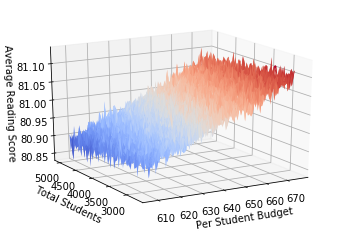

In [163]:
#3D Visualization of the multilinear regression model 
x =np.linspace(int(Per_Student_Budget.min())-20, int(Per_Student_Budget.max())+20, int(Average_Reading_Score.max())+10)
y =np.linspace(int(Total_Students.min())-20, int(Total_Students.max())+20, int(Average_Reading_Score.max())+10)

# We generate a 2D grid
X, Y = np.meshgrid(x,y)

Range_reading=Average_Reading_Score.max()-Average_Reading_Score.min()
Range_budget=Per_Student_Budget.max()-Per_Student_Budget.min()
ratio_reading=Range_reading/Range_budget

# To get reproducable values, provide a seed value
np.random.seed(1)

# Z is the elevation of this 2D grid
Z = 79.3118 + 0.0027*X -1.368e-05*Y + np.random.normal(size=X.shape)*ratio_reading

#+ 8 * np.random.normal(size=X.shape)
# Plot the data
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('Per Student Budget')
ax.set_ylabel('Total Students')
ax.set_zlabel('Average Reading Score')

In [164]:
#Implement the multilinear regression model to analyze how school size and budget per person impact District schools' performance in Math
Per_Student_Budget = school_table7["Per Student Budget"]
Total_Students = school_table7["Total Students"]
Average_Math_Score = school_table7["Average Math Score"]

data = pd.DataFrame({'Per_Student_Budget': Per_Student_Budget, 'Total_Students': Total_Students, "Average_Math_Score" : Average__Score})

# Fit the model
model = ols("Average_Math_Score ~ Per_Student_Budget + Total_Students", data).fit()

# Print the summary
print(model.summary())

print("\nRetrieving manually the parameter estimates:")
print(model._results.params)

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)
#Both coefficients lack small p-values
#ANOVA statistics suggest no evidence of either per student budget or school size impacting district school's performance in Reading

                            OLS Regression Results                            
Dep. Variable:     Average_Math_Score   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.234
Date:                Fri, 18 Dec 2020   Prob (F-statistic):              0.383
Time:                        14:55:04   Log-Likelihood:                 2.3964
No. Observations:                   7   AIC:                             1.207
Df Residuals:                       4   BIC:                             1.045
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             73.6345      6

Text(0.5, 0, 'Average Math Score')

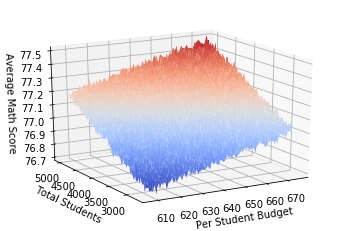

In [166]:
#3D Visualization of the multilinear regression model 
x =np.linspace(int(Per_Student_Budget.min())-20, int(Per_Student_Budget.max())+20, int(Average_Math_Score.max())+10)
y =np.linspace(int(Total_Students.min())-20, int(Total_Students.max())+20, int(Average_Math_Score.max())+10)
# We generate a 2D grid
X, Y = np.meshgrid(x,y)


Range_math=Average_Math_Score.max()-Average_Math_Score.min()
Range_budget=Per_Student_Budget.max()-Per_Student_Budget.min()
ratio_math=Range_math/Range_budget

# To get reproducable values, provide a seed value
np.random.seed(1)

# Z is the elevation of this 2D grid
Z = 73.6345 + 0.0042*X + 0.0002*Y + np.random.normal(size=X.shape)*ratio_math

#+ 8 * np.random.normal(size=X.shape)
# Plot the data
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm,
                       rstride=1, cstride=1)
ax.view_init(20, -120)
ax.set_xlabel('Per Student Budget')
ax.set_ylabel('Total Students')
ax.set_zlabel('Average Math Score')